🤖 Automation can be extremely useful in generating process data in process simulators. Here are a few ways that automation can be used to improve the efficiency and accuracy of process simulation:

💻 Batch Processing: Automation can be used to run multiple simulations in batch mode, allowing large numbers of simulations to be performed quickly and easily. This can help to generate a large amount of process data in a short amount of time, enabling the identification of trends and patterns that might not be evident from individual simulations.

📜 Scripting: Scripting can be used to automate the process of creating simulation models, defining simulation parameters, and running simulations. This can help to ensure that simulations are performed consistently and accurately, reducing the risk of errors or omissions.

🔍 Optimization: Automation can be used to automate the optimization of process parameters, allowing simulations to be run with different sets of parameters in order to identify the most efficient and effective combination. This can help to reduce the time and cost associated with optimization studies, and can also help to identify opportunities for process improvement.

📊 Data Analysis: Automation can be used to analyze large amounts of simulation data, enabling trends and patterns to be identified quickly and easily. This can help to improve the accuracy of process simulations, and can also help to identify areas for process improvement.

Overall, automation can be an extremely useful tool in generating process data in process simulators. By automating repetitive or time-consuming tasks, simulation engineers can focus on the more complex and challenging aspects of the simulation process, ultimately leading to better process designs and more efficient and effective manufacturing processes. 🚀

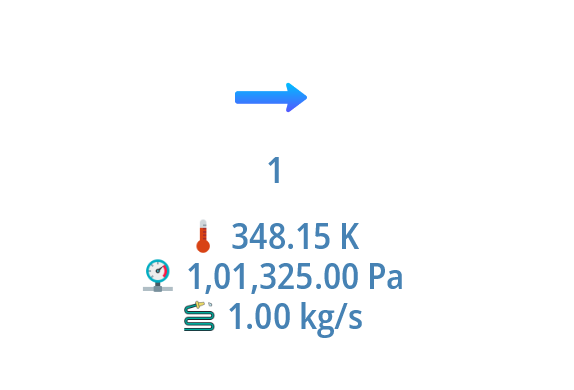

In [1]:
# Import the display function from the IPython.display module
from IPython.display import display

# Import the Image class from the PIL module
from PIL import Image

# Open an image file using the Image class and assign it to the variable Basis_image
Basis_image = Image.open("/workspace/00 Automation for Material Stream/00 Automation for material stream.png")

# Display the Basis_image using the display function from IPython.display


display(Basis_image)

In [2]:
import os
os.environ["PYTHONNET_RUNTIME"] = "coreclr"
os.environ["DOTNET_SYSTEM_DRAWING_USE_GDIPLUS"] = "1"

import clr
import numpy as np
import time
from datetime import timedelta
from pythonnet import load
from System import Environment

# Load .NET Core runtime
load("coreclr")

# Try to import System.IO; fallback to os.chdir if it fails
try:
    from System.IO import Directory, Path, File
    use_dotnet_dir = True
except Exception as e:
    print(f"Note: System.IO import failed ({e}), using os.chdir instead")
    import os
    use_dotnet_dir = False

# Define DWSIM path
dwsimpath = "/usr/local/lib/dwsim/"

# Set working directory
if use_dotnet_dir:
    Directory.SetCurrentDirectory(dwsimpath)
else:
    os.chdir(dwsimpath)

# Add DWSIM assemblies
clr.AddReference(dwsimpath + "CapeOpen.dll")
clr.AddReference(dwsimpath + "DWSIM.Automation.dll")
clr.AddReference(dwsimpath + "DWSIM.Interfaces.dll")
clr.AddReference(dwsimpath + "DWSIM.GlobalSettings.dll")
clr.AddReference(dwsimpath + "DWSIM.SharedClasses.dll")
clr.AddReference(dwsimpath + "DWSIM.Thermodynamics.dll")
clr.AddReference(dwsimpath + "DWSIM.UnitOperations.dll")
clr.AddReference(dwsimpath + "DWSIM.Inspector.dll")
clr.AddReference(dwsimpath + "System.Buffers.dll")
clr.AddReference(dwsimpath + "DWSIM.Thermodynamics.ThermoC.dll")

# Now import DWSIM types
from DWSIM.Interfaces.Enums.GraphicObjects import ObjectType
from DWSIM.Thermodynamics import Streams, PropertyPackages
from DWSIM.UnitOperations import UnitOperations
from DWSIM.Automation import Automation3
from DWSIM.GlobalSettings import Settings

print("DWSIM imports successful!")

DWSIM imports successful!


In [3]:
# Create an instance of the Automation3 class from the DWSIM.Automation module
# This class provides methods for automating tasks in DWSIM, such as creating and manipulating flowsheets
interf = Automation3()

In [4]:
# Set the file path of an existing DWSIM flowsheet to be loaded using the Path.Combine method from the System.IO module
# The flowsheet file path is constructed using the Environment.GetFolderPath method to obtain the path to the desktop folder and the relative path to the flowsheet file
fileNameToLoad = Path.Combine(Environment.GetFolderPath(Environment.SpecialFolder.Desktop), "/workspace/00 Automation for Material Stream/00 Automation for material stream.dwxmz")

# Load the DWSIM flowsheet using the LoadFlowsheet method of the Automation3 class
# The method takes a single argument, which is the file path of the flowsheet to be loaded
# The method returns a Simulation object that represents the loaded flowsheet
sim = interf.LoadFlowsheet(fileNameToLoad)

In [5]:
# Get the inlet stream object from the loaded DWSIM flowsheet using the GetObject method of the Simulation object
# The method takes a single argument, which is the ID of the object to be retrieved
# In this case, the ID of the inlet stream object is "1"
inlet_stream = sim.GetObject("1")

# Convert the retrieved stream object to an object of the Streams.Stream class from the DWSIM.Thermodynamics module
# This is necessary so that the stream object can be manipulated using the methods and properties provided by the Streams.Stream class
inlet_stream = inlet_stream.GetAsObject()

In [6]:
# Get the current flash specifications of the inlet stream using the GetFlashSpec method of the inlet stream object
# The method returns a tuple of two values: the first value is the type of flash (i.e., "TP", "PQ", or "UV"), and the second value is a dictionary of flash specifications (e.g., temperature, pressure, vapor fraction, liquid fraction)
flash_spec = inlet_stream.GetFlashSpec()

# Print the flash specifications to the console
# The print function outputs the value of the "flash_spec" variable to the console
# The output should be a tuple of two values, which represent the current flash type and specifications of the inlet stream object
print(flash_spec)

PT


In [7]:
# get the current temperature of the inlet stream
current_temperature = inlet_stream.GetTemperature()
current_temperature

348.15

In [8]:
# get the current pressure of the inlet stream
current_pressure = inlet_stream.GetPressure()
current_pressure

101325.0

In [9]:
# get the current massflow of the inlet stream
current_massflow = inlet_stream.GetMassFlow()
current_massflow

1.0

In [10]:
# get the current molar flow rate of the inlet stream
current_molarflowrate = inlet_stream.GetMolarFlow()
current_molarflowrate

20.3885403354649

In [11]:
# get the current specific enthalphy of the inlet stream
specific_enthalphy = inlet_stream.GetMassEnthalpy()
specific_enthalphy

-617.398110912666

In [12]:
# get the current entrophy of the inlet stream
specific_entrophy = inlet_stream.GetMassEntropy()
specific_entrophy

-1.6483482303665

In [13]:
# get the current vol flow rate of the inlet stream
vol_flowrate = inlet_stream.GetVolumetricFlow()
vol_flowrate

0.00120970784431441

In [14]:
# get the current molecular weight of the inlet stream
mol_weight = inlet_stream.GetOverallMolecularWeight()
mol_weight

49.04716

In [15]:
# get the energy flow to the stream
energy_flow = inlet_stream.GetEnergyFlow()
energy_flow

-321.68272188708

In [16]:
# gets the obj name
obj = inlet_stream.GetDisplayName()
obj

'Material Stream'

In [17]:
# gets the number of compounds in the inlet stream
no_of_compounds = inlet_stream.GetNumCompounds()
no_of_compounds

2

In [18]:
# setting the inlet stream as a graphic obj to get the user defined name of material stream
inlet_stream.GraphicObject.get_Tag()

'1'

In [19]:
# Gets the property package of the material stream
inlet_stream.get_PropertyPackage()

In [20]:
# Gets the mass fraction of the material stream
list(inlet_stream.GetOverallComposition())

[0.6, 0.4]

In [21]:
# Gives a list of compounds in flowsheet
list(inlet_stream.get_ComponentIds())

['Acetonitrile', 'Nitromethane']

In [22]:
# Gets number of phases in material stream
inlet_stream.GetNumPhases()

3

In [23]:
print(f'The current pressure of stream is', current_pressure,'Pa')
print(f'The current temperature of stream is', current_temperature,'K')
print(f'The current mass flow of stream is', current_massflow,'kg/s')
print(f'The current molar flow of stream is', current_molarflowrate,'mol/s')
print(f'The current volumetric flow of stream is', vol_flowrate,'m3/s')
print(f'The current specific enthalphy of stream is', specific_enthalphy,'kJ/kg')
print(f'The current specific entrophy of stream is', specific_entrophy,'kJ/kg.K')
print(f'The current energy flow of stream is', energy_flow,'kW')

The current pressure of stream is 101325.0 Pa
The current temperature of stream is 348.15 K
The current mass flow of stream is 1.0 kg/s
The current molar flow of stream is 20.3885403354649 mol/s
The current volumetric flow of stream is 0.00120970784431441 m3/s
The current specific enthalphy of stream is -617.398110912666 kJ/kg
The current specific entrophy of stream is -1.6483482303665 kJ/kg.K
The current energy flow of stream is -321.68272188708 kW


In [24]:
# set the new temperature of the inlet stream
new_massflow = current_massflow + 4.0 # increase the massflow by 4 kg/s
inlet_stream.SetMassFlow(new_massflow)

'1: mass flow set to 5 kg/s'

In [25]:
# Set the solver mode of DWSIM to use the default solver by setting the SolverMode property of the Settings object to 0
Settings.SolverMode = 0

# Request a calculation of the flowsheet using the CalculateFlowsheet2 method of the automation manager object
# The method takes a single argument, which is the simulation object that represents the flowsheet model to be calculated
# The method returns a list of error messages, which can be used to diagnose and troubleshoot simulation errors
errors = interf.CalculateFlowsheet2(sim)

In [26]:
# get the current temperature of the inlet stream
modified_temperature = inlet_stream.GetTemperature()
modified_temperature
modified_pressure = inlet_stream.GetPressure()
modified_pressure
modified_massflow = inlet_stream.GetMassFlow()
modified_massflow
modified_molarflow = inlet_stream.GetMolarFlow()
modified_molarflow
modified_specific_enthalphy = inlet_stream.GetMassEnthalpy()
modified_specific_enthalphy
modified_specific_entrophy = inlet_stream.GetMassEntropy()
modified_specific_entrophy
modified_vol_flowrate = inlet_stream.GetVolumetricFlow()
modified_vol_flowrate
modified_energy_flow = inlet_stream.GetEnergyFlow()
modified_energy_flow

-1608.4136094354012

In [27]:
print(f'The modified pressure of stream is', modified_pressure,'Pa')
print(f'The modified temperature of stream is', modified_temperature,'K')
print(f'The modified mass flow of stream is', modified_massflow,'kg/s')
print(f'The modified molar flow of stream is', modified_molarflow,'mol/s')
print(f'The modified volumetric flow of stream is', modified_vol_flowrate,'m3/s')
print(f'The modified specific enthalphy of stream is', modified_specific_enthalphy,'kJ/kg')
print(f'The modified specific entrophy of stream is', modified_specific_entrophy,'kJ/kg.K')
print(f'The modified energy flow of stream is', modified_energy_flow,'kW')

The modified pressure of stream is 101325.0 Pa
The modified temperature of stream is 348.15 K
The modified mass flow of stream is 5.0 kg/s
The modified molar flow of stream is 101.94270167732444 mol/s
The modified volumetric flow of stream is 0.006048539221572027 m3/s
The modified specific enthalphy of stream is -617.3981109126657 kJ/kg
The modified specific entrophy of stream is -1.6483482303664954 kJ/kg.K
The modified energy flow of stream is -1608.4136094354012 kW


In [28]:
from tabulate import tabulate

# Define the initial mass flow rate
mass_flow_rate = inlet_stream.GetMassFlow()

# Set the solver mode to use the default solver
Settings.SolverMode = 0

# Create an empty list to store the results
results = []

# Iterate 10 times, increasing the mass flow rate by 1 kg/s each time
for i in range(10):
    # Increase the mass flow rate by 1 kg/s
    mass_flow_rate += 1.0
    
    # Set the new mass flow rate of the inlet stream
    inlet_stream.SetMassFlow(mass_flow_rate)
    
    # Calculate the flowsheet
    errors = interf.CalculateFlowsheet2(sim)
    
    # Get the new flash spec and pressure
    flash_spec = inlet_stream.GetFlashSpec()
    temp = inlet_stream.GetTemperature()
    pressure = inlet_stream.GetPressure()
    mass_flow_rate = inlet_stream.GetMassFlow()
    molar_flowrate = inlet_stream.GetMolarFlow()
    vol_flowrate = inlet_stream.GetVolumetricFlow()
    specific_enthalphy = inlet_stream.GetMassEnthalpy()
    specific_entrophy = inlet_stream.GetMassEntropy()
    
    # Append the results to the list
    results.append([flash_spec, temp, pressure, mass_flow_rate, molar_flowrate, vol_flowrate, specific_enthalphy, specific_entrophy])

# Define the headers for the table
headers = ["Flash Spec", "Temperature", "Pressure", "Mass Flow", "Molar Flow", "Volumetric Flow", "Specific Enthalpy", "Specific Entropy"]

# Print the results in a table format
print(tabulate(results, headers=headers, tablefmt="grid"))


+--------------+---------------+------------+-------------+--------------+-------------------+---------------------+--------------------+
| Flash Spec   |   Temperature |   Pressure |   Mass Flow |   Molar Flow |   Volumetric Flow |   Specific Enthalpy |   Specific Entropy |
+==============+===============+============+=============+==============+===================+=====================+====================+
| PT           |        348.15 |     101325 |           6 |      122.331 |        0.00725825 |            -617.398 |           -1.64835 |
+--------------+---------------+------------+-------------+--------------+-------------------+---------------------+--------------------+
| PT           |        348.15 |     101325 |           7 |      142.72  |        0.00846795 |            -617.398 |           -1.64835 |
+--------------+---------------+------------+-------------+--------------+-------------------+---------------------+--------------------+
| PT           |        348.15 |  

In [29]:
# saving the modified version of file at same path

fileNameToSave = Path.Combine(Environment.GetFolderPath(Environment.SpecialFolder.Desktop), "/workspace/00 Automation for Material Stream/00 Automation for material stream builder.dwxmz")

interf.SaveFlowsheet(sim, fileNameToSave, True)